In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [2]:
# Explore data

df = pd.read_csv('candy-data.csv')
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]

df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [3]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [4]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()


In [5]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_test = test_df["chocolate"]



In [6]:

y_test.head()

8     0
0     1
51    1
32    1
74    1
Name: chocolate, dtype: int64

### Data Exploration

In [7]:
y_train.value_counts()

chocolate
0    41
1    27
Name: count, dtype: int64

In [8]:
sns.countplot("chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

TypeError: countplot() got multiple values for argument 'data'

In [ ]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate", pct_of_choc*100)


In [ ]:
train_df.groupby('chocolate').mean()

In [9]:
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.586207,0.137931,0.034483,0.051724,0.189655,0.155172,0.603448,0.465724,0.433552,48.094896,0.344828
1,0.100000,0.200000,0.200000,0.200000,0.100000,0.500000,0.300000,0.618200,0.644900,58.593874,0.700000


### Model Development and Prediction
Import the Scikit Learn Logistic Regression module
Fit model on the train set using fit() then perform prediction on test set using prediction

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6, 1],
       [1, 9]], dtype=int64)

### Visualize CFM (confusion matrix) using a heatmap

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

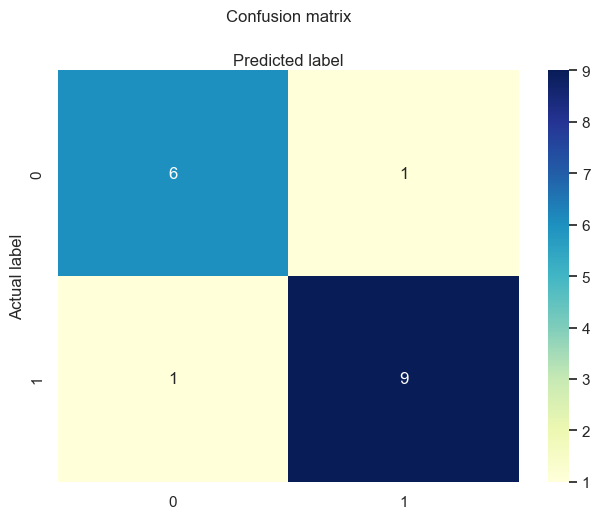

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### CFM evaluation metrics Accuracy, Precision, Recall

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8823529411764706
Precision: 0.9
Recall: 0.9


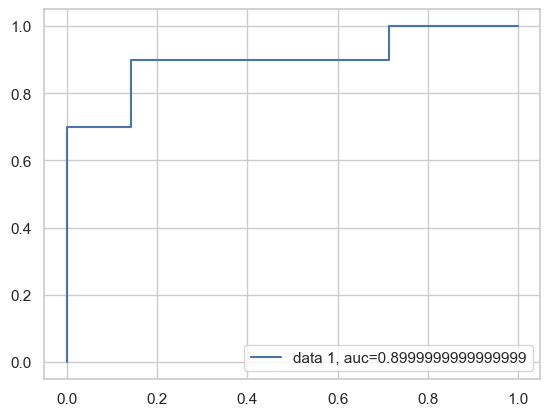

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()